Please wait for the kernel to be ready. It may take *a couple minutes*. When it is ready, the **circle** on the top-right corner of this browser window should be **open**.

<img src="https://raw.githubusercontent.com/mcvine/training/master/images/kernel-ready.png"/>

# Resolution function for single-crystal measurements at DGS instruments
 

import tools

In [38]:
from matplotlib import pyplot as plt
import numpy as np, os, glob
import histogram.hdf as hh, histogram as H
%matplotlib notebook
%matplotlib notebook

define and enter working dir

In [23]:
workdir = os.path.expanduser('~/simulations/mcvine/resolution/demo-singlecrystal')
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/simulations/mcvine/resolution/demo-singlecrystal


## Beam
Define the beam path by modifying the following cell. A DGS beam can be simulated using <a href="../jui/DGS-beam.ipynb">this notebook </a>

In [3]:
beam = "/SNS/users/lj7/simulations/CNCS/beam/17meV-HF-n1e9/"
instrument = 'CNCS'
Ei = 17.

## Sample

Please modify the following cell to match your sample specification such as chemical formula, lattice parameters, and orientation (by u,v vectors), and shape. Please make sure keep the "excitations" section intact

In [4]:
%%file sample.yaml
name: Si
chemical_formula: Si
lattice: 
 constants: 5.431, 5.431, 5.431, 90, 90, 90
 basis_vectors:
  - 5.431, 0, 0
  - 0, 5.431, 0
  - 0, 0, 5.431
excitations:
 - type: DGSresolution
orientation:
 u: 1, 0, 0
 v: 0, 0, 1
shape: cylinder radius="1*cm" height="2*cm"
temperature: 300*K

Overwriting sample.yaml


This is the path of sample yaml file

In [24]:
sampleyml = "{workdir}/sample.yaml".format(**locals())
sampleyml

'/SNS/users/lj7/simulations/mcvine/resolution/demo-singlecrystal/sample.yaml'

# Instrument spec

In [8]:
from dgsres.singlextal import use_res_comps

CNCS

In [15]:
#Here define the angle ranges for the sample scattering and instrument properties
print "Using beam at", beam
psi_axis = -30, 60, 1
instrument = use_res_comps.instrument(
    name = 'CNCS',
    detsys_radius = "3.5*meter",
    L_m2s = "36.264*meter",
    offset_sample2beam = "-0.15*meter" # offset from sample to saved beam. don't change this unless you are sure what you are doing
    )
pixel = use_res_comps.pixel(
    radius = "0.5*inch",
    height = "2.*meter/128",
    pressure = "6*atm",
    )
def scattering_angle_constraints(theta, phi):
    return ((theta<135.) * (theta > 3.) + (theta < -3)*(theta>-50)) * (phi<16) * (phi>-16)

Using beam at /SNS/users/lj7/simulations/CNCS/beam/17meV-HF-n1e9/


## psi scan

In [10]:
class psi_scan:
    min = -30.
    max = 60.
    step = 1.

# Try one point

In [11]:
cd {workdir}

/SNS/users/lj7/simulations/mcvine/resolution/demo-singlecrystal


** Define projection direction and starting point **

In [12]:
hkl_projection = np.array([0,0,1])

In [13]:
hkl0 = np.array([0.,0,0])
hkl0

array([ 0.,  0.,  0.])

** Plot dynamical range **

In [14]:
qaxis = np.arange(-6, 6, .1) # this might need tuning

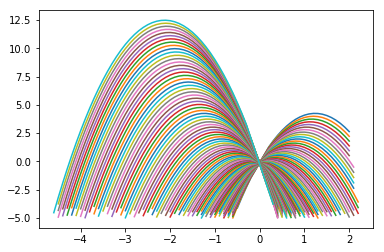

In [25]:
from mcvine.workflow.singlextal import dynrange
from mcvine.workflow.sample import loadSampleYml
sample = loadSampleYml(sampleyml)
psilist = np.arange(psi_scan.min, psi_scan.max, psi_scan.step)
plt.figure()
dynrange.plotDynRangeOfSlice(
    sample, psilist, Ei, hkl0, hkl_projection, qaxis,
    scattering_angle_constraints,
    Erange=(-5, 16))
plt.show()

** Define point of interest **

In [26]:
E = 5.
q = -2

In [28]:
hkl = hkl0 + hkl_projection*q
hkl

array([ 0.,  0., -2.])

** Run simulation setup **

In [29]:
# rm -rf test/

In [30]:
use_res_comps.setup(
    'test',
    sampleyml, beam, E, hkl, hkl_projection,
    psi_scan, instrument, pixel)

Ei=17.1784508025, t0=117.843730238
Computed:
* psi=35.6549103512 degree
* Q=[ 1.34873172 -1.88007921  0.        ]
* hkl2Qmat=[[ 0.94003961  0.67436586  0.        ]
 [-0.         -0.         -1.15691131]
 [-0.67436586  0.94003961  0.        ]]
* ki=2.87928299932
* vectors ki=[ 2.879283  0.        0.      ], kf=[ 1.53055128  1.88007921  0.        ]
These two numbers should be very close:
  5.0
  5.0
  Ei=17.1784508025, Ef=12.1784508025
* Ef=12.1784508025
* pixel positon=[ 2.20967067  2.71428729  0.        ]
* pixel_position=[ 2.20967067  2.71428729  0.        ]
t_m2s=0.0201216006499, t_s2p=0.00229297796609, t_m2p=0.022414578616


/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mcvine/workflow/singlextal/solve_psi.py:55: UserWarning: Traceback (most recent call last):
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mcvine/workflow/singlextal/solve_psi.py", line 52, in solve
    results.append(solver(res, min, max))
  File "/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/scipy/optimize/zeros.py", line 442, in brentq
    r = _zeros._brentq(f,a,b,xtol,rtol,maxiter,args,full_output,disp)
ValueError: f(a) and f(b) must have different signs

  warnings.warn(tb.format_exc())
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mcvine/workflow/sampleassembly/scaffolding/sampleassembly_xml.py:20: UserWarning: assume average temperature
  warnings.warn("assume average temperature")


In [31]:
ls test

run.py  sample/


In [32]:
#! cat test/run.py

In [34]:
#! cat test/sample/*-scatterer.xml

** Run simulation. This will take a couple minutes **

In [35]:
!cd test && python run.py

weight:  1.0
0-9999: ........../SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mcni/SimulationContext.py:39: UserWarning: output directory was not set
  warnings.warn("output directory was not set")

10000-19999: ..........
20000-29999: ..........
30000-39999: ..........
40000-49999: ..........
50000-59999: ..........
60000-61357: ..........
Done.


In [65]:
# !cat test/log.run

In [36]:
ls -tl test

total 1352
-rw-r--r-- 1 lj7 users   24432 Apr 25 15:50 res.h5
-rw-r--r-- 1 lj7 users  396296 Apr 25 15:50 probs.npy
-rw-r--r-- 1 lj7 users  396296 Apr 25 15:50 dEs.npy
-rw-r--r-- 1 lj7 users  396296 Apr 25 15:50 dxs.npy
-rw-r--r-- 1 lj7 users 1188728 Apr 25 15:50 dhkls.npy
-rw-r--r-- 1 lj7 users    1205 Apr 25 15:49 run.py
drwxr-xr-x 2 lj7 users       5 Apr 25 15:49 sample/


plot z in (0.0, 0.071975225961)


<IPython.core.display.Javascript object>


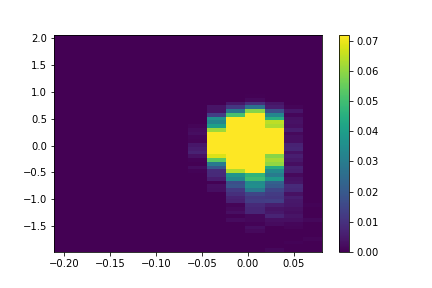

In [42]:
H.plot(hh.load("test/res.h5")[(-0.2,None), (None, 2)])

In [72]:
ls test

dEs.npy  dhkls.npy  dxs.npy  probs.npy  res.h5  run.py  sample/


In [43]:
# load simulated data
probs = np.load('test/probs.npy')
dEs = np.load('test/dEs.npy')
dhkls = np.load('test/dhkls.npy')

In [44]:
# compute 2D histogram using custom binning along q and E axes
qs = np.dot(dhkls, hkl_projection)/np.linalg.norm(hkl_projection)**2
I, qedges, Eedges = np.histogram2d(bins=(np.arange(-0.2, 0.2, 0.005), np.arange(-2,2,0.1)), weights=probs, x=qs, y=dEs )

<IPython.core.display.Javascript object>


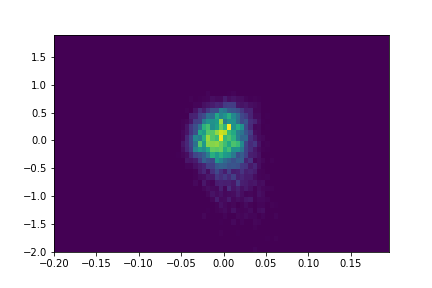

In [49]:
# plot
qg, Eg = np.meshgrid(qedges, Eedges)
plt.figure()
plt.pcolormesh(qg, Eg, I.T)
plt.show()

# Save

In [50]:
np.savetxt('qedges.txt', qedges)
np.savetxt('Eedges.txt', Eedges)
np.savetxt('intensity.txt', I)